In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium, calculate
import numpy as np
from pycalphad.tests.datasets import *
dbf = Database('alzn_mey.tdb')

In [15]:
from pycalphad.core.solver import InteriorPointSolver
class ProblemSaver(InteriorPointSolver):
    saved_problem = [None]
    def solve(self, prob):
        self.saved_problem[0] = prob
        self.verbose = True
        return super(ProblemSaver, self).solve(prob)
v.T.default_value = 300
eq2 = equilibrium(dbf, ['AL', 'ZN', 'VA'], ['FCC_A1', 'LIQUID', 'HCP_A3'],
                 {v.X('ZN'): 0.25, v.NP('LIQUID'): 1e-4,
                  v.P: 1e5}, verbose=False, solver=ProblemSaver())
print(eq2)

Composition Sets [CompositionSet(FCC_A1, [0.12024048 0.87975952], NP=0.3333333333333333, GM=-10489.356271065852), CompositionSet(HCP_A3, [1.e-13 1.e+00], NP=0.3333333333333333, GM=-12489.369042323267), CompositionSet(LIQUID, [0.00200401 0.99799599], NP=0.0001 [fixed], GM=-8422.501520948857)]
Chemical Potentials [0. 0.]
Trying to improve poor solution
Chemical Potentials [-28779.50157    -39577.68033263]
[ 1.00000000e+00  1.00000000e+05  1.00000000e-04 -5.82076609e-11
 -1.16415322e-10  1.16415322e-10  1.00000000e+06  2.50000000e+05
 -2.84451380e-06 -3.77322867e-05 -1.83143929e-05]
[1.00000000e+00 1.00000000e+05 7.57290281e+02 7.50037693e-01
 2.49962307e-01 3.90286420e-02 9.60971358e-01 3.80216762e-01
 6.19783238e-01 9.99899000e-01 9.99999900e-07 1.00000000e-04]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Trying to improve poor solution
Chemical Potentials [-28882.02737094 -40654.7434106 ]

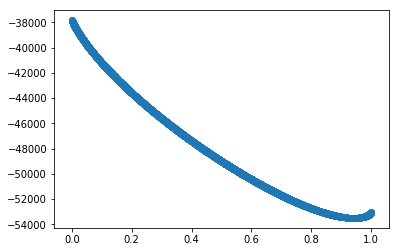

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

res = calculate(dbf, ['AL', 'ZN'], 'LIQUID', T=933, P=1e5, N=1)
plt.scatter(res.X.sel(component='ZN').values.flatten(), res.GM.values.flatten())

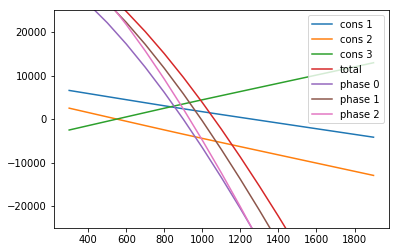

In [4]:
import numpy as np
def constraint_calculator(temps):
    # Should be zero at T=933
    x_in = [1.00000000e+00, 1.00000000e+05, 5.50287189e+02, 6.09376025e-01,
 3.90623975e-01, 9.99900396e-01, 9.96040963e-05, 9.99807427e-01,
 1.92572993e-04, 1.00000000e-06, 9.99899010e-01, 1.00000000e-04]
    desired_chempots = [-37840.74636944, -110371.97774282]
    cons = []
    total_chempots = []
    phase0_chempots = []
    phase1_chempots = []
    phase2_chempots = []
    for temp in temps:
        x_in[2] = temp
        cons.append(ProblemSaver.saved_problem[0].constraints(x_in))
        total_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in))
        phase0_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=0))
        phase1_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=1))
        phase2_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=2))
    cons = np.array(cons)
    total_chempots = np.array(total_chempots) - np.array(desired_chempots)
    phase0_chempots = np.array(phase0_chempots) - np.array(desired_chempots)
    phase1_chempots = np.array(phase1_chempots) - np.array(desired_chempots)
    phase2_chempots = np.array(phase2_chempots) - np.array(desired_chempots)
    return cons, total_chempots, phase0_chempots, phase1_chempots, phase2_chempots

def constraint_calculator_2(xfccs):
    # Should be zero at T=933
    x_in = [1.00000000e+00, 1.00000000e+05, 5.50287189e+02, 6.09376025e-01,
 3.90623975e-01, 9.99900396e-01, 9.96040963e-05, 9.99807427e-01,
 1.92572993e-04, 1.00000000e-06, 9.99899010e-01, 1.00000000e-04]
    desired_chempots = [-37840.74636944, -110371.97774282]
    cons = []
    total_chempots = []
    phase0_chempots = []
    phase1_chempots = []
    phase2_chempots = []
    for xfcc in xfccs:
        #x_in[2] = 933
        x_in[3] = xfcc
        x_in[4] - 1-xfcc
        cons.append(ProblemSaver.saved_problem[0].constraints(x_in))
        total_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in))
        phase0_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=0))
        phase1_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=1))
        phase2_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=2))
    cons = np.array(cons)
    total_chempots = np.array(total_chempots) - np.array(desired_chempots)
    phase0_chempots = np.array(phase0_chempots) - np.array(desired_chempots)
    phase1_chempots = np.array(phase1_chempots) - np.array(desired_chempots)
    phase2_chempots = np.array(phase2_chempots) - np.array(desired_chempots)
    return cons, total_chempots, phase0_chempots, phase1_chempots, phase2_chempots

temps = np.arange(300., 2000., step=100)
xfccs = np.linspace(1e-6,1-1e-6, num=100)
results = constraint_calculator(temps)
results_2 = constraint_calculator_2(xfccs)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temps, results[0][:, -3], label='cons 1')
plt.plot(temps, results[0][:, -2], label='cons 2')
plt.plot(temps, results[0][:, -1], label='cons 3')
plt.plot(temps, results[1][:, 0], label='total')
plt.plot(temps, results[2][:, 0], label='phase 0')
plt.plot(temps, results[3][:, 0], label='phase 1')
plt.plot(temps, results[4][:, 0], label='phase 2')
plt.ylim((-25000, 25000))
#plt.xlim((700, 900))
#plt.plot(xfccs, results_2[0][:, -2], label='cons 1')
#plt.plot(xfccs, results_2[0][:, -1], label='cons 2')
#plt.xlim((0,0.1))
plt.legend(loc='best')

In [5]:
results[0][:, -3]

array([ 6588.19278706,  5878.70641541,  5169.59714678,  4461.59886575,
        3756.31161478,  3056.81599222,  2368.53011418,  1698.4990745 ,
        1040.65349622,   387.07280931,  -264.89398788,  -916.19925803,
       -1567.21439462, -2218.0946833 , -2866.77071432, -3517.3748913 ,
       -4167.96118945])

In [6]:
results[0][0]

array([ 1.00000000e+00,  1.00000000e+05,  1.00000000e-04,  5.82076609e-11,
        9.63000661e-05, -6.99997486e-06,  1.00000001e+06,  1.00003919e+02,
        6.58819279e+03,  2.51156245e+03, -2.51156781e+03])

In [7]:
results[0][:, -2]

array([  2511.56244959,   1507.72551976,    504.26569273,   -498.08314691,
        -1497.72095667,  -2491.56713815,  -3474.20357527,  -4438.58517416,
        -5390.78131176,  -6338.71255809,  -7285.02991481,  -8230.68574457,
        -9176.05144086, -10121.2822893 , -11064.36689372, -12009.29140107,
       -12954.19802962])

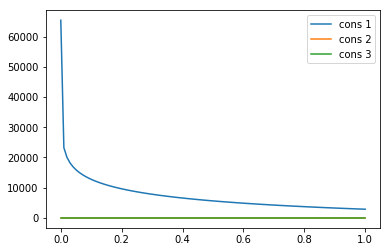

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xfccs, results_2[0][:, -3], label='cons 1')
plt.plot(xfccs, results_2[0][:, -2], label='cons 2')
plt.plot(xfccs, results_2[0][:, -1], label='cons 3')
#plt.xlim((0.5,1.0))
#plt.ylim((-10000, 10000))
plt.legend(loc='best')